## Complete Case Analysis (CCA)

# Concept and defination

Complete Case Analysis (CCA) is called "list-wise-deletion" of cases, consists of discarding observations where values (rows)
in any variable ( feature/column ) are missing

CCA means literally analyzing only those observations for which there is information in for all variables in the dataset

# Assumptions

1) Missing Completely at random (MCAR) : Missing data should be random i.e. not like first k rows(values) or last k values are missing

        it changes the distribution of the data

# Advantages

1. Easy to implement as you don't need data manipulation (pd.dropna)

2. Reserves variable distribution (if data is MCAR, then the distribution of the variable of the reduced dataset should match with distribution in original dataset)

# Disadvantages

1. Can exclude large portion of the dataset

2. Excluded information could be informative if data is not missing at random

3. When using ml models in the productions (models deployed on the server), the model will not know how to handle the missing data

# When to use CCA

1. Data should be MCAR

2. Missing data < 5% (Missing data sould be less than 5%)

# Example (Code)

# A) Numerical Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\ml_revision\Missing_values\Datasets\data_science_job.csv')

In [3]:
df.shape

(19158, 13)

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
cols = [  var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

In [9]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [11]:
print(len(df[cols]))
print(len(df))

19158
19158


In [12]:
len(df[cols].dropna())/ len(df)

0.8968577095730244

In [13]:
new_df = df[cols].dropna()

In [14]:
print(df.shape)
print(new_df.shape)

(19158, 13)
(17182, 5)


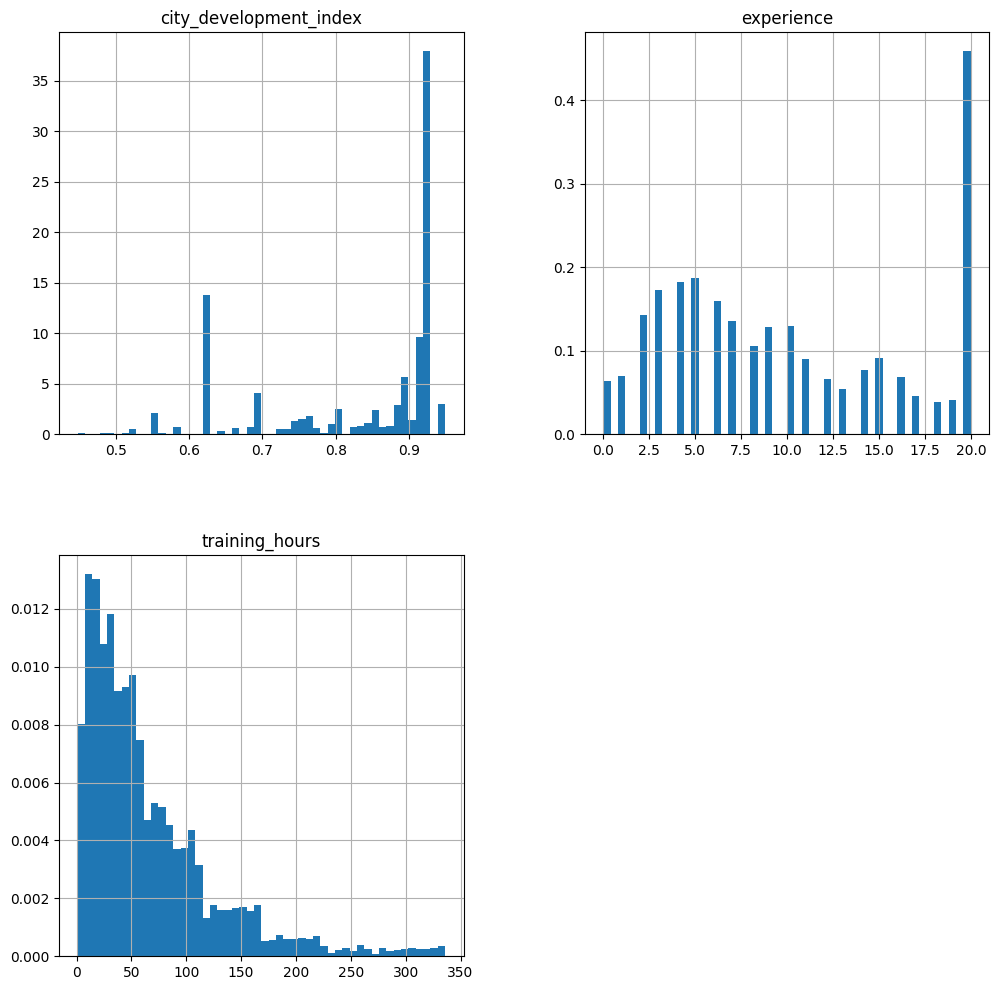

In [17]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<Axes: >

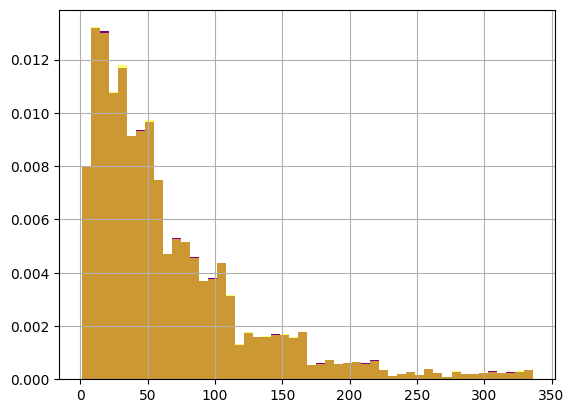

In [20]:
# Individually analyzing each column 


fig = plt.figure()
ax = fig.add_subplot(111)

#original_data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='purple')

#Data after cca
# Argument alpha makes the color transperent, so we can see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax =ax , color = 'yellow', density = True, alpha = 0.6)

<Axes: ylabel='Density'>

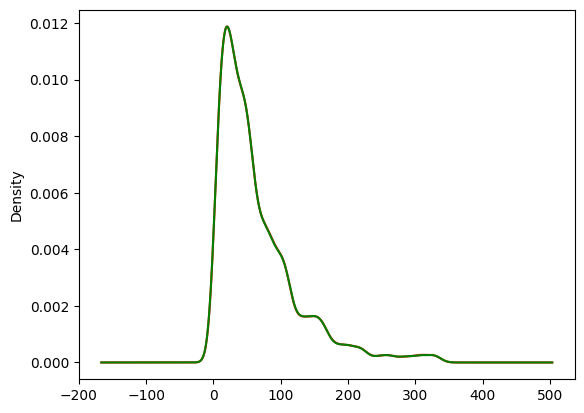

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# Modified data
new_df['training_hours'].plot.density(color='green')

<Axes: >

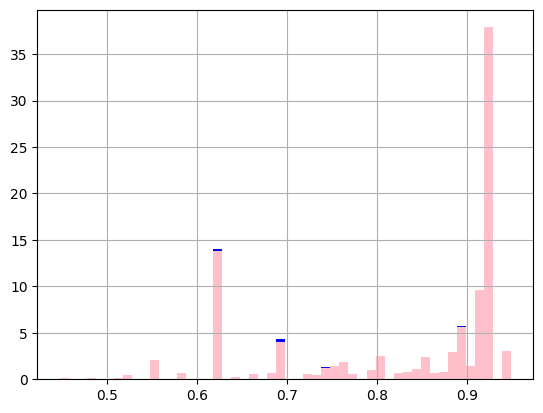

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data 
df['city_development_index'].hist(bins=50,color='blue', density=True, ax = ax)

#Modified data
new_df['city_development_index'].hist(bins=50,color='pink', density=True, ax = ax)

<Axes: ylabel='Density'>

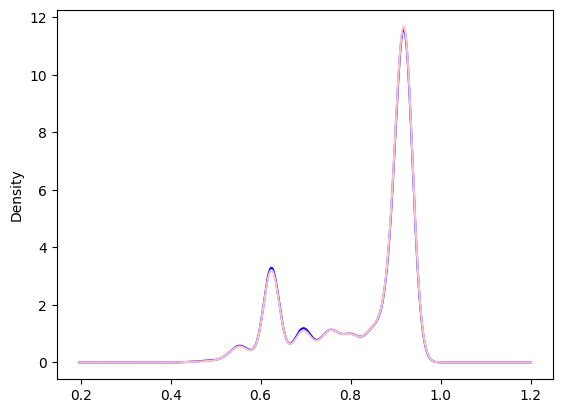

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='blue')

# Modified data
new_df['city_development_index'].plot.density(color='pink')

<Axes: >

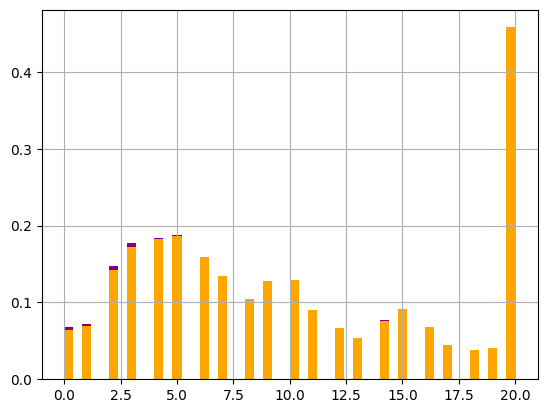

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data 
df['experience'].hist(bins=50,color='purple', density=True, ax = ax)

#Modified data
new_df['experience'].hist(bins=50,color='orange', density=True, ax = ax)

<Axes: ylabel='Density'>

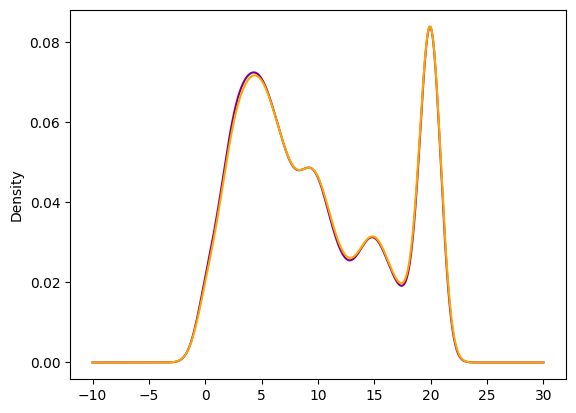

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='purple')

# Modified data
new_df['experience'].plot.density(color='orange')

# B) Categorical Columns

## check the ration of categories in the categorical column before and after... if it is not changing significantly then the value removal not causes distribution change

In [44]:
def show_relation(feature):

    #percentage of observations per category (original data)
    print("Ration analysis")

    print("\n\n Old data")
    print(df[feature].value_counts() / len(df))

    #percentage of observations per category (Modified data)
    print("\n Modified data")
    print(new_df[feature].value_counts() / len(df))

# Add column names



In [45]:
show_relation('enrolled_university')

Ration analysis


 Old data
enrolled_university
no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: count, dtype: float64

 Modified data
enrolled_university
no_enrollment       0.659359
Full time course    0.180029
Part time course    0.057469
Name: count, dtype: float64


In [47]:
show_relation('education_level')

Ration analysis


 Old data
education_level
Graduate          0.605387
Masters           0.227633
High School       0.105282
Phd               0.021610
Primary School    0.016077
Name: count, dtype: float64

 Modified data
education_level
Graduate          0.555904
Masters           0.209938
High School       0.096304
Phd               0.019835
Primary School    0.014876
Name: count, dtype: float64
